In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('数据整合.csv')
data.head()

,Formula,Band gap,MP-ID,density,vpa,packing fraction,Central symmetry
0,Ba3Ca2(SiN3)2,1.875,mp-1019520,4.570851,17.671158,0.834911,0
1,IrI3,1.398,mp-1025442,6.805422,34.949094,0.320381,0
2,ThTe3,1.088,mp-1025522,6.862531,37.193373,0.395979,0
3,Y4Se3N2,1.445,mp-1029349,4.989108,22.947597,0.576815,0
4,RbSbO2,2.277,mp-10418,4.731690,20.988543,0.821177,0


In [2]:
data['Central symmetry'].value_counts()

1    310
0    297
Name: Central symmetry, dtype: int64

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [4]:
y = data['Central symmetry'].values
excluded = ['Formula', 'MP-ID', 'Central symmetry']
X = data.drop(excluded, axis = 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
scaler.fit(X_train)

StandardScaler()

In [8]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [9]:
np.mean(X_train_s, axis = 0)

array([-2.07381282e-16,  2.36707928e-16, -5.02742502e-17, -8.37904170e-17])

In [10]:
modelsvc = SVC(kernel="linear", random_state = 1)
modelsvc.fit(X_train_s, y_train)
modelsvc.score(X_test_s, y_test)

0.7923497267759563

In [11]:
param_grid = {'C': [0.1, 1, 10],
              'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
              'gamma': [0.01, 0.1, 1]}
kfold = StratifiedKFold(n_splits=10, shuffle=True,
                        random_state = 55)
model_svc = GridSearchCV(SVC(random_state = 56),
                     param_grid, cv = kfold)

In [12]:
model_svc.fit(X_train_s, y_train)
model_svc.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [13]:
model_svc.score(X_test_s, y_test)

0.8579234972677595

In [17]:
model_svc.best_estimator_

SVC(C=1, gamma=1, random_state=56)

In [20]:
model_SVC = SVC(C= 1, gamma= 1, random_state= 56,kernel='rbf')
model_SVC.fit(X_train_s, y_train)
model_SVC.score(X_test_s, y_test)

0.8579234972677595

In [21]:
y_pred = model_SVC.predict(X_test_s)
y_pred.shape

(183,)

[[82  8]
 [18 75]]


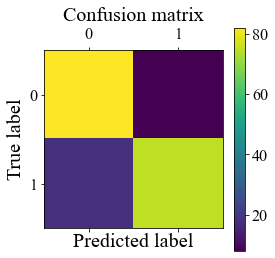

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman']
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix',fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.ylabel('True label', fontsize = 20)
plt.xlabel('Predicted label',fontsize = 20)
plt.savefig('c3.png', dpi = 300)
#plt.show()

In [23]:
#from sklearn.inspection import plot_partial_dependence
table = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
table

Predicted,0,1
Actual,,
0,82,8
1,18,75


In [24]:
table = np.array(table)
Accuracy = (table[0, 0] + table[1,1]) /np.sum(table)
print(Accuracy)

Error_rate = 1 - Accuracy
print(Error_rate)

0.8579234972677595
0.14207650273224048


In [25]:
Precision = table[1, 1]/(table[1, 1]+table[0, 1])
print('Precision:', Precision)

Sensitivity = table[1, 1]/(table[1, 0] + table[1,1])
print(Sensitivity)

Specificity = table[0, 0] /(table[0,0] + table[0, 1])
print(Specificity)

Recall = table[1, 1] /(table[0, 1] + table[1,1])
print(Recall)

print(f1_score(y_test, y_pred))
cohen_kappa_score(y_test, y_pred)

Precision: 0.9036144578313253
0.8064516129032258
0.9111111111111111
0.9036144578313253
0.8522727272727273


0.7162790697674419

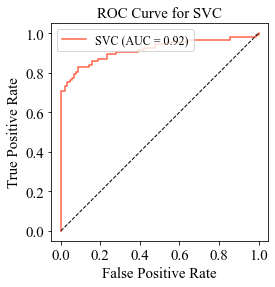

In [26]:
from sklearn.metrics import RocCurveDisplay
plt.rcParams['font.sans-serif']=['Times New Roman']

RocCurveDisplay.from_estimator(model_SVC, X_test_s, y_test, color = 'tomato')
x = np.linspace(0, 1, 100)
plt.plot(x, x, 'k--', linewidth = 1)
plt.title('ROC Curve for SVC', fontsize = 15)
plt.axis('square')
plt.xlim()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate',fontsize = 15)
fontdict = {'family': 'Times New Roman',
            'size': 12}
            #'style': 'italic'}
plt.legend(prop=fontdict, loc = 'upper left')
plt.savefig('r3.png', dpi = 300)
#plt.show()